# This script will define functions for comparing various model fields between 2 ANHA4 runs 

Need a function for the following:
Yearly average of Temp and salinity.
Cross sections of Temp and salinity.


In [1]:
from __future__ import division, print_function

import netCDF4 as nc
import numpy as np

import numpy.ma as ma
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib as mpl
import glob
from mpl_toolkits.basemap import cm,addcyclic,Basemap, shiftgrid
from mpl_toolkits import basemap
import warnings
from exceptions import KeyError
from netCDF4 import Dataset
%matplotlib inline

In [2]:
mesh = nc.Dataset('/mnt/storage0/jacquielee/research/data/Jasper/mesh_mask_anha4_201509.nc')

In [3]:
mask = mesh.variables['tmask'][0]
mbathy = ma.array(mesh.variables['mbathy'][0],mask=(mask[0,:,:]-1)*-1)

In [4]:
avg = nc.Dataset('/mnt/storage0/jacquielee/research/data/ANHA4-VJT002/ANHA4-VJT002_2012-2016avg_vosaline.nc')

In [7]:
sal = ma.array(avg.variables['vosalinefour'],mask=(mask-1)*-1)
print(sal[:,100,250])

[35.77531109117482 35.782737353076676 35.78682016346553 35.78944540677006
 35.79141900310778 35.79317290162387 35.794886536794166 35.796766895137424
 35.79880869878482 35.80180661972255 35.805667720428886 35.80967380575938
 35.814973818112726 35.82241088396882 35.836412377553444 35.85379302664979
 35.874600083860635 35.90019176430898 35.938493062372075 35.97596526472536
 35.98196955902936 35.972412736448526 35.92546213489689 35.852537455624095
 35.76989983859127 35.70679906296404 35.61422981628 35.47927434477088
 35.31745726441684 35.16745362216479 35.04216880014498 34.900114738777894
 34.768193676047126 34.73474842228302 34.71698088188694 34.726005515007124
 34.78266036673768 34.868023754799204 34.91615087692052 34.92238819435851
 34.904841083369845 34.89650603516461 34.89217183361315 34.88822323002228
 34.88498849738134 -- -- -- -- --]


In [4]:
#state locations of output
control = '/mnt/storage0/xhu/NEMO/ANHA4-EXH005/ANHA4-EXH005_'
control_storage = '/mnt/storage0/jacquielee/research/data/ANHA4-EXH005/ANHA4-EXH005_'
stlandj = '/mnt/storage0/jacquielee/research/data/ANHA4-VJT002/ANHA4-VJT002_'
polzin  = '/mnt/storage0/jacquielee/research/data/ANHA4-VJT003/ANHA4-VJT003_'

In [5]:
year = '2012'
month = '01'
day = '05'

In [7]:
cgridW = nc.Dataset(control+'y'+year+'m'+month+'d'+day+'_gridT.nc')
#nsq = cgridW.variables['nsquare']

In [7]:
#cgridW.variables

In [8]:
zlevels = cgridW.variables['deptht']
nav_lon=cgridW.variables['nav_lon'][:]
nav_lat=cgridW.variables['nav_lat'][:]

In [9]:
nav_lat[:,272]

array([-20.07611084, -19.8411274 , -19.605793  , -19.37011719,
       -19.13409805, -18.89774132, -18.66104889, -18.4240284 ,
       -18.18667793, -17.94900703, -17.71101379, -17.47270584,
       -17.23408508, -16.99515724, -16.75592232, -16.51638603,
       -16.27655411, -16.03642845, -15.79601192, -15.5553112 ,
       -15.31432724, -15.07306671, -14.83153152, -14.58972645,
       -14.3476553 , -14.10532284, -13.86273193, -13.61988831,
       -13.37679386, -13.13345432, -12.8898735 , -12.64605522,
       -12.40200424, -12.15772438, -11.91322041, -11.66849518,
       -11.42355442, -11.17840195, -10.93304157, -10.68747902,
       -10.44171619, -10.19575977,  -9.94961357,  -9.7032814 ,
        -9.45676804,  -9.21007824,  -8.96321583,  -8.71618557,
        -8.46899128,  -8.22163868,  -7.97413206,  -7.72647524,
        -7.47867298,  -7.23073006,  -6.98265076,  -6.73443985,
        -6.4861021 ,  -6.23764181,  -5.98906374,  -5.74037266,
        -5.49157286,  -5.24266911,  -4.9936657 ,  -4.74

In [9]:
def yearly_average(path, year):
    '''
    Calcluates the average temperature and salinity values over the whole ANHA4 
    domain for a given year
    '''
    filename = glob.glob(path+'y'+year+'m??d??_gridT.nc')
    avg_sal = np.zeros((50,800,544),dtype=float)
    avg_temp = np.zeros((50,800,544),dtype=float)
    
    for f in np.arange(0,len(filename)):
        tracer = nc.Dataset(filename[f])
        temp = tracer.variables['votemper'][0,:,:,:]
        sal = tracer.variables['vosaline'][0,:,:,:]
        avg_sal[:,:,:] = avg_sal[:,:,:]+sal[:,:,:]
        avg_temp[:,:,:] = avg_temp[:,:,:]+temp[:,:,:]
    avg = len(filename)*np.ones((50,800,544))
    avg_sal = ma.array(avg_sal/avg,mask=(mask-1)*-1)
    avg_temp = ma.array(avg_temp/avg,mask=(mask-1)*-1)
    tracer = nc.Dataset(filename[0])
    zlevels = tracer.variables['deptht']
    nav_lon=tracer.variables['nav_lon'][:]
    nav_lat=tracer.variables['nav_lat'][:]
    print('Done Averaging T+S '+year)
    return avg_sal,avg_temp, zlevels, nav_lat, nav_lon
def monthly_average(path):
    
    for year in range(2002,2011):
        for month in range(1,13):
            
            filename = glob.glob(path+'y'+str(year)+'m{:02d}'.format(month)+'d??_gridT.nc')
            avg_sal = np.zeros((50,800,544),dtype=float)
            avg_temp = np.zeros((50,800,544),dtype=float)
            for f in np.arange(0,len(filename)):
                tracer = nc.Dataset(filename[f])
                temp = tracer.variables['votemper'][0,:,:,:]
                sal = tracer.variables['vosaline'][0,:,:,:]
                avg_sal[:,:,:] = avg_sal[:,:,:]+sal[:,:,:]
                avg_temp[:,:,:] = avg_temp[:,:,:]+temp[:,:,:]
                
            avg = len(filename)*np.ones((50,800,544))
            avg_sal = ma.array(avg_sal/avg,mask=(mask-1)*-1)
            avg_temp = ma.array(avg_temp/avg,mask=(mask-1)*-1)
            
            nrows = 800
            ncols = 544
            nvert = 50
    
            netfile = Dataset(control_storage+'avg_GridT_y'+str(year)+'_m{:02d}.nc'.format(month), 'w', format='NETCDF3_64BIT')
            print(path+'avg_GridT_y'+str(year)+'_m{:02d}.nc'.format(month))
            netfile.createDimension('x', nrows)
            netfile.createDimension('y', ncols)
            netfile.createDimension('z', nvert)
            t_var = netfile.createVariable('votemper', 'f8', ('z','x', 'y'))
            s_var = netfile.createVariable('vosaline', 'f8', ('z','x', 'y'))
            t_var[:,:,:] = avg_temp[:,:,:]
            s_var[:,:,:] = avg_sal[:,:,:]
            netfile.close()
    
    #tracer = nc.Dataset(path+'_y'+2004+'m'+12+'d'+21+'_gridT.nc')
def yearly_average_kappa(path, year):
    filename = glob.glob(path+'y'+year+'m??d??_gridW.nc')
    avg_kappa = np.zeros((50,800,544),dtype=float)
    for f in np.arange(0,len(filename)):
        tracer = nc.Dataset(filename[f])
        kappa = tracer.variables['votkeavt'][0,:,:,:]
        avg_kappa[:,:,:] = avg_kappa[:,:,:]+kappa[:,:,:]
    avg = len(filename)*np.ones((50,800,544))
    avg_kappa = ma.array(avg_kappa/avg,mask=(mask-1)*-1)
    print('Done Averaging Kappa '+year)
    return avg_kappa
    
    #tracer = nc.Dataset(path+'_y'+2004+'m'+12+'d'+21+'_gridT.nc')
    
def yearly_average_nsquare(path, year):
    filename = glob.glob(path+'y'+year+'m??d??_nsquare.nc')
    avg_var = np.zeros((50,800,544),dtype=float)
    for f in np.arange(0,len(filename)):
        tracer = nc.Dataset(filename[f])
        var = tracer.variables['nsquare'][:,:,:]
        avg_var[:,:,:] = avg_var[:,:,:]+var[:,:,:]
    avg = len(filename)*np.ones((50,800,544))
    avg_var = ma.array(avg_var/avg,mask=(mask-1)*-1)
    print('Done Averaging Nsq '+year)
    return avg_var

In [10]:
monthly_average(control)
month = 1

print('month{:02d}'.format(month))

/mnt/storage0/xhu/NEMO/ANHA4-EXH005/ANHA4-EXH005_avg_GridT_y2002_m01.nc
/mnt/storage0/xhu/NEMO/ANHA4-EXH005/ANHA4-EXH005_avg_GridT_y2002_m02.nc


KeyboardInterrupt: 

In [10]:
def compute_zonal(kappa,calcKappa=False, zonalmask=False):

    k_zonal = np.zeros((len(kappa[:,0,0]),len(kappa[0,:,0])), dtype='float')
    
    if calcKappa==True:
        for k in np.arange(0,len(kappa[:,0,0])):
            counter = 0.0
            tot = 0.0
            for i in np.arange(0,len(kappa[0,:,0])):
                for j in np.arange(0,len(kappa[0,0,:])):
                    if ma.is_masked(kappa[k,i,j]) == False and kappa[k,i,j]<=10**-2:
                            counter = counter+1
                            tot = tot + kappa[k,i,j]
                if counter!= 0:
                    k_zonal[k,i] = tot/counter
                    
    elif zonalmask==True:
        for k in np.arange(0,len(kappa[:,0,0])):
            for i in np.arange(0,len(kappa[0,:,0])):
                k_zonal[k,i] = np.sum(kappa[k,i,:])/len(kappa[k,i,:])
        
    else:
        for k in np.arange(0,len(kappa[:,0,0])):
            for i in np.arange(0,len(kappa[0,:,0])):
                counter = 0.0
                tot = 0.0
                for j in np.arange(0,len(kappa[0,0,:])):
                    if ma.is_masked(kappa[k,i,j]) == False:
                            counter = counter+1
                            tot = tot + kappa[k,i,j]
                if counter!= 0:

                    k_zonal[k,i] = tot/counter

    
    return k_zonal


In [14]:
def plot_zonal(y_len,H,zonal_var,min_log,max_scale,title,ticks=None,sym=False):
    
    '''
    y_len = length of y axis
    H = Depth levels
    zonal_var = zonal variable that is 50X800
    min_log = either the minimum value in log or the smallest log on positive or negative magnitude in symlog
    max_scale = max value of variable
    title = title of the contour plot
    ticks = optional variable that can contain a list of ticks for the colorbar
    sym = if set to true the symlog scale will be used to account for positive and negative values
    
    '''
    fig, ax = plt.subplots(1, 1, figsize=(20, 20))
    
    
    
    vmax = 10**(-15)
    
    
     # Define scaling levels for the logarithmic colouring.
    minimum_log_level = min_log
    maximum_scale_level = max_scale
    # Use a standard colour map which varies blue-white-red.
    # For suitable options, see the 'Diverging colormaps' section in:
    # http://matplotlib.org/examples/color/colormaps_reference.html

    # Create a 'logarithmic' data normalization.
    
    x = np.arange(0,800)
    y = H[:]
    X, Y = np.meshgrid(x[:], y[:])
    
    if sym == False:
        norm = colors.LogNorm(vmin=minimum_log_level,
                                 vmax=maximum_scale_level)
        cmap = plt.get_cmap('jet',25)
        cmap.set_bad('burlywood')
        
    if sym == True:
        norm = colors.SymLogNorm(vmin=-maximum_scale_level,
                                 vmax=maximum_scale_level,linthresh=minimum_log_level,linscale=0)
        cmap = plt.get_cmap('seismic')
        cmap.set_bad('burlywood')
    
    
    # Setting "linthresh=minimum_log_level" makes its non-logarithmic
    # data range equal to our 'zero band'.
    # Setting "linscale=0" maps the whole zero band to the middle colour value
    # (i.e. 0.5), which is the neutral point of a "diverging" style colormap.

    # Make a pseudocolour plot using this colour scheme.
    
    mesh = ax.pcolor(X,Y,zonal_var[:,:], cmap=cmap, norm=norm)

    # Add a colourbar, with extensions to show handling of out-of-range values.
    bar = plt.colorbar(mesh, orientation='horizontal', extend='both')

    #Set some suitable fixed "logarithmic" colourbar tick positions.
    
    if sym ==True:
#         tick_levels = [-0.000001,-0.00001, -0.0001,-0.001,-0.01,-0.1,-1,-10,-100,
#                    0.0, 100,10,1,0.1,0.01,0.001,0.0001, 0.00001,0.000001]
        bar.set_ticks(ticks)
        
        #Modify the tick labels so that the centre one shows "+/-<minumum-level>".
        ticks[5] = r'$\pm${:g}'.format(minimum_log_level)
        bar.set_ticklabels(ticks)

    bar.ax.tick_params(labelsize=15) 
    # Label the colourbar to show the units.
    bar.set_label('[Kappa log scale]',size=15)
    

#clines = ax.contour(E,0.0,colors='white')
    ax.grid()                                                                                                                                     
    ax.set_title(title)
#ax.set_title('Turbulent Dissipation Rate',depth[40])
    ax.set_xlabel('y Index')
    ax.set_ylabel('depth')
    ax.set_ylim(ax.get_ylim()[::-1])
    
    return None

In [11]:
years=['2002','2003','2004','2005','2006','2007','2008','2009','2010','2011','2012','2013','2014','2015']
avgsC = {}
avgsLJ = {}
avgsP = {}
for year in years:
    cs, ct, zlevel, navlat, navlon = yearly_average(control,year)
    ck = yearly_average_kappa(control,year)
    nk = yearly_average_nsquare(control_storage,year)
#     try:
#         avgsC['cs'].append(cs)
#     except KeyError:
#         avgsC['cs'] = [cs]
        
#     try:
#         avgsC['ct'].append(ct)
#     except KeyError:
#         avgsC['ct'] = [ct]
#     try:
#         avgsC['ck'].append(ck)
#     except KeyError:
#         avgsC['ck'] = [ck]
#     try:
#         avgsC['cn'].append(nk)
#     except KeyError:
#         avgsC['cn'] = [nk]

Done Averaging T+S 2002
Done Averaging Kappa 2002


KeyboardInterrupt: 

In [ ]:

avgsLJ = {}
for year in years:
    #cs, ct, zlevel, navlat, navlon = yearly_average(control,year)
    ljs, ljt, x, y, z = yearly_average(stlandj,year) 
    ljk = yearly_average_kappa(stlandj,year)
    ljn = yearly_average_nsquare(stlandj, year)
#     try:
#         avgsLJ['ljs'].append(ljs)
#     except KeyError:
#         avgsLJ['ljs'] = [ljs]
        
#     try:
#         avgsLJ['ljt'].append(ljt)
#     except KeyError:
#         avgsLJ['ljt'] = [ljt]
#     try:
#         avgsLJ['ljk'].append(ljk)
#     except KeyError:
#         avgsLJ['ljk'] = [ljk]
#     try:
#         avgsLJ['ljn'].append(ljn)
#     except KeyError:
#         avgsLJ['ljn'] = [ljn]

In [ ]:
avgsP = {}
for year in years:
    ps, pt, x , y, z = yearly_average(polzin,year)
    pk = yearly_average_kappa(polzin,year)
    pn = yearly_average_nsquare(polzin, year)
#     try:
#         avgsP['ps'].append(ps)
#     except KeyError:
#         avgsP['ps'] = [ps]
        
#     try:
#         avgsP['pt'].append(pt)
#     except KeyError:
#         avgsP['pt'] = [pt]
#     try:
#         avgsP['pk'].append(pk)
#     except KeyError:
#         avgsP['pk'] = [pk]
#     try:
#         avgsP['pn'].append(pn)
#     except KeyError:
#         avgsP['pn'] = [pn]

In [16]:
def plot_kappa(ax,zonal_var,min_log,max_scale,zlevel, depth, ticks=None,sym=False):
    
    '''
    zonal_var = zonal variable that is 50X800
    min_log = either the minimum value in log or the smallest log on positive or negative magnitude in symlog
    max_scale = max value of variable
    title = title of the contour plot
    ticks = optional variable that can contain a list of ticks for the colorbar
    sym = if set to true the symlog scale will be used to account for positive and negative values
    
    '''
    #ig, ax = plt.subplots(1, 1, figsize=(20, 20))
    
    
    
    vmax = 10**(-15)
    
    
     # Define scaling levels for the logarithmic colouring.
    minimum_log_level = min_log
    maximum_scale_level = max_scale
    # Use a standard colour map which varies blue-white-red.
    # For suitable options, see the 'Diverging colormaps' section in:
    # http://matplotlib.org/examples/color/colormaps_reference.html

    # Create a 'logarithmic' data normalization.
    
    x = np.arange(0,800)
    y = np.arange(0,544)
    X, Y = np.meshgrid(x[:], y[:])
    
    if sym == False:
        norm = colors.LogNorm(vmin=minimum_log_level,
                                 vmax=maximum_scale_level)
        cmap = plt.get_cmap('jet',25)
        cmap.set_bad('burlywood')
        cmap.set_over(color='grey')
        
    if sym == True:
        norm = colors.SymLogNorm(vmin=-maximum_scale_level,
                                 vmax=maximum_scale_level,linthresh=minimum_log_level,linscale=0)
        cmap = plt.get_cmap('seismic')
        cmap.set_over(color='grey')
        #cmap.set_bad('burlywood')
    
    
    # Setting "linthresh=minimum_log_level" makes its non-logarithmic
    # data range equal to our 'zero band'.
    # Setting "linscale=0" maps the whole zero band to the middle colour value
    # (i.e. 0.5), which is the neutral point of a "diverging" style colormap.

    # Make a pseudocolour plot using this colour scheme.
    
    mesh = ax.pcolormesh(zonal_var[:,:], cmap=cmap, norm=norm)

    # Add a colourbar, with extensions to show handling of out-of-range values.
#     bar = plt.colorbar(mesh)

#     #Set some suitable fixed "logarithmic" colourbar tick positions.
    
#     if sym ==True:
# #         tick_levels = [-0.000001,-0.00001, -0.0001,-0.001,-0.01,-0.1,-1,-10,-100,
# #                    0.0, 100,10,1,0.1,0.01,0.001,0.0001, 0.00001,0.000001]
#         bar.set_ticks(ticks)
        
#         #Modify the tick labels so that the centre one shows "+/-<minumum-level>".
#         ticks[5] = r'$\pm${:g}'.format(minimum_log_level)
#         bar.set_ticklabels(ticks)

#     bar.ax.tick_params(labelsize=15) 
#     # Label the colourbar to show the units.
#     bar.set_label('[Kappa log scale]',size=15)
    

#clines = ax.contour(E,0.0,colors='white')
    ax.grid()    
    #ax.set_title(u't = {t:.1f} Day, depth \u2248 {d:.2f}{z.units}'.format(t=7, d=zlevels[zlevel], z=zlevels))
    ax.set_title('control-slj-2011 avg '+str(zlevel[depth])+'m depth')
    ax.tick_params(which='both', bottom='off',top='off',labelbottom='off',labelleft='off')
    ax.axis((0, kappav.shape[2], 0, kappav.shape[1]))
#ax.set_title('Turbulent Dissipation Rate',depth[40])
#     ax.set_xlabel('y Index')
#     ax.set_ylabel('x Index')
    #ax.set_ylim(ax.get_ylim()[::-1])
    
    return mesh


In [17]:
#kappav[0,500:600,300]

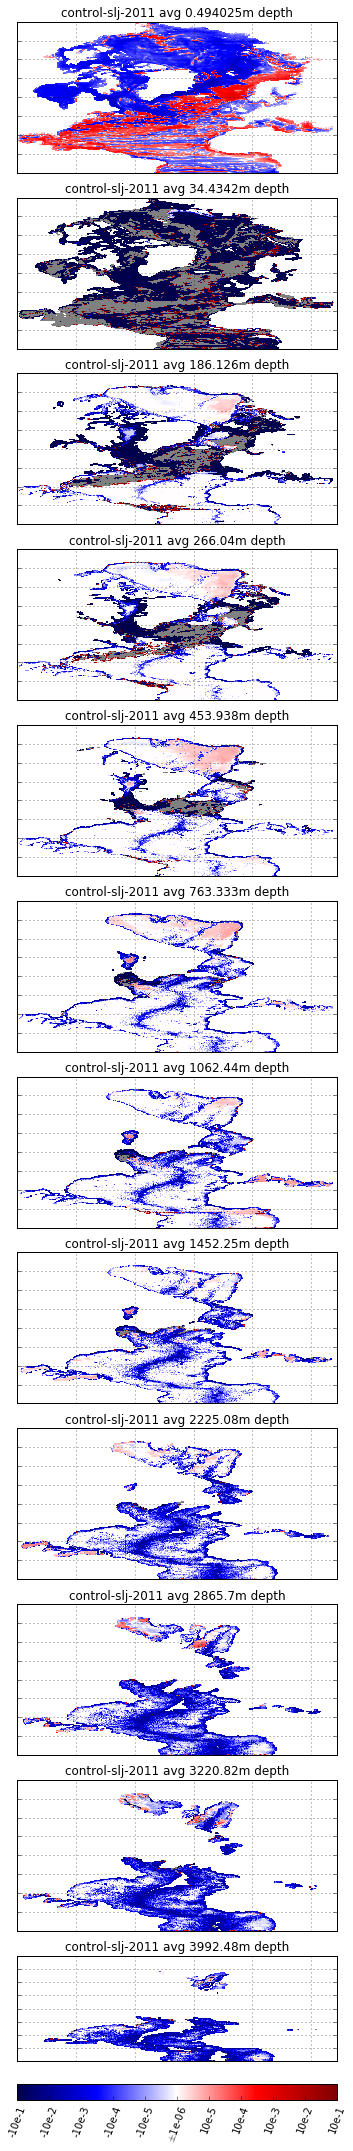

In [18]:
#kappav = avgsC['ck'][0]
#kappav = avgsP['pk'][0]
#kappav = avgsLJ['ljk'][0]
kappav = avgsC['ck'][0]-avgsLJ['ljk'][0]
fig, axes = plt.subplots(12, 1, figsize=(5, 30))
zlevel = (0,15,25,27,30,33,35,37,40,42,43,45)

for axis, depth in zip(axes[:],zlevel):
    mesh = plot_kappa(axis,kappav[depth,:,:],10**-6,10**-1,zlevels, depth,sym=True)

ticks = [-10**-1,-10**-2, -10**-3, -10**-4, -10**-5,10**-6, 10**-5, 10**-4, 10**-3, 10**-2,10**-1]    
bar = plt.colorbar(mesh, ticks=ticks,orientation='horizontal',format='%.0e')
#bar = plt.colorbar(mesh,orientation='horizontal')
ticks = ['-10e-1','-10e-2', '-10e-3', '-10e-4', '-10e-5','10e-6', '10e-5', '10e-4', '10e-3', '10e-2','10e-1']
ticks[5] = r'$\pm${:g}'.format(10**-6)
bar.ax.set_xticklabels(ticks,rotation=70)
plt.tight_layout()

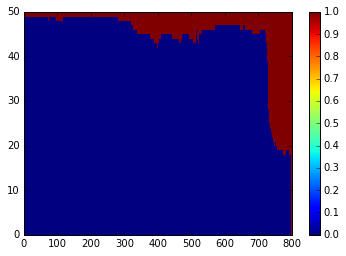

In [19]:
zonal_mask = compute_zonal(mask,zonalmask=True)*(-1)
zonal_mask[zonal_mask[:,:]==0.0]=1
zonal_mask[zonal_mask[:,:]<0.0]=0
z = plt.pcolor(zonal_mask)
plt.colorbar(z)
plt.show()

In [20]:
# avgsC={}
# avgsP={}
# avgsLJ={}
# avgsC['ck'] = np.load('ck2002')
# avgsC['ct'] = np.load('ct2002')
# avgsC['cs'] = np.load('cs2002')
# avgsP['pk'] = np.load('pk2002')
# avgsP['pt'] = np.load('pt2002')
# avgsP['ps'] = np.load('ps2002')
# avgsLJ['ljk'] = np.load('ljk2002')
# avgsLJ['ljt'] = np.load('ljt2002')
# avgsLJ['ljs'] = np.load('ljs2002')

In [21]:
# avgs = {'cs':c_avgsal,'ct':c_avgtemp,'ck':c_avgkap, 'ljs':VJT02_avgsal,'ljt':VJ02_avgtemp, 'ljk':VJT02_avgkap, 
#         'ps':VJT03_avgsal, 'pt':VJ03_avgtemp, 'pk':VJT03_avgkap}
#years = ['2002']

# for year in years:
#     zonalC['ck'+year] = ma.array(compute_zonal(np.load('ck'+year)),mask=zonal_mask)
#     zonalC['cs'+year] = ma.array(compute_zonal(np.load('cs'+year)),mask=zonal_mask)
#     zonalC['ct'+year] = ma.array(compute_zonal(np.load('ct'+year)),mask=zonal_mask)
#     zonalLJ['ljk'+year] = ma.array(compute_zonal(np.load('ljk'+year)),mask=zonal_mask)
#     zonalLJ['ljs'+year] = ma.array(compute_zonal(np.load('ljs'+year)),mask=zonal_mask)
#     zonalLJ['ljt'+year] = ma.array(compute_zonal(np.load('ljt'+year)),mask=zonal_mask)
#     zonalP['pk'+year] = ma.array(compute_zonal(np.load('pk'+year)),mask=zonal_mask)
#     zonalP['ps'+year] = ma.array(compute_zonal(np.load('ps'+year)),mask=zonal_mask)
#     zonalP['pt'+year] = ma.array(compute_zonal(np.load('pt'+year)),mask=zonal_mask)

zonalC = {}
for data in avgsC.keys():
    for ii in range(len(years)):
        if data[0:2]== 'ck':
            print(data[0:2])
            x = compute_zonal(avgsC[data][ii],calcKappa=True)
        else:
            x = compute_zonal(avgsC[data][ii])
        zonalC[str(data)+years[ii]] = ma.array(x,mask=zonal_mask)
        #avgsC[data][ii].dump(str(data)+years[ii])
        
zonalLJ = {}
for data in avgsLJ.keys():
    for ii in range(len(years)):
        if data[0:3]== 'ljk':
            print(data[0:3])
            x = compute_zonal(avgsLJ[data][ii],calcKappa=True)
        else:
            x = compute_zonal(avgsLJ[data][ii])
        zonalLJ[str(data)+years[ii]] = ma.array(x,mask=zonal_mask)
        #avgsLJ[data][ii].dump(str(data)+years[ii])
        
zonalP = {}
for data in avgsP.keys():
    for ii in range(len(years)):
        if data[0:2]== 'pk':
            print(data[0:2])
            x = compute_zonal(avgsP[data][ii],calcKappa=True)
        else:
            x = compute_zonal(avgsP[data][ii])
        zonalP[str(data)+years[ii]] = ma.array(x,mask=zonal_mask)
        #avgsP[data][ii].dump(str(data)+years[ii])
             

ck
ljk
pk


In [22]:
bin1 = np.logspace(-12, -2, 40)

In [23]:
bins = np.zeros((80))
bins[40:] = bin1
bins[0:40] = bin1[::-1]*-1

In [24]:
print(zonalP['pn2011'])

[[-- 0.0 0.0 ..., 0.0 0.0 --]
 [-- 1.9018419692073056e-05 3.7204259312994104e-05 ...,
  8.954005081604014e-05 0.00020542236686488285 --]
 [-- 1.9761565048502233e-05 3.551183269802743e-05 ...,
  0.0001425664249944702 0.00015328854831829814 --]
 ..., 
 [-- 4.47464361898504e-07 3.8590269459523034e-07 ..., -- -- --]
 [-- 2.409307226483126e-07 1.5260632402735138e-07 ..., -- -- --]
 [-- -- -- ..., -- -- --]]


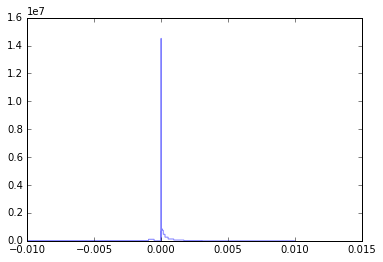

In [25]:
n = plt.hist(avgsC['cn'][0].flatten(),bins=bins,stacked=True,histtype='step',alpha=0.5,
         label='slj')

In [26]:
labels = map(str, nav_lat[:,272])[::100]
labels2 = [elem[:3] for elem in labels]
print(labels2)

['-20', '4.4', '28.', '48.', '64.', '77.', '86.', '78.']


In [27]:
labels3 = ['20S', '4N', '28N', '48N', '64N', '77N', '86N', '78N']

In [28]:
line_lat = nav_lat[:,272]
line_lon = nav_lon[:,272]

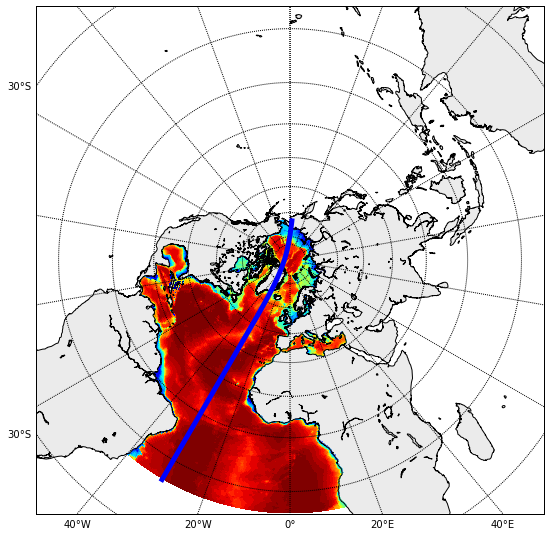

In [29]:
fig = plt.figure(figsize=(20,20))
ax = fig.add_subplot(1,2,1)
m = Basemap(projection='npstere',boundinglat=-20,lon_0=0,resolution='l')
m.drawcoastlines()
m.fillcontinents(color = '0.85',alpha=0.5)
m.drawparallels(np.arange(-90.,90.,15.),labels=[1, 0, 0, 0])
m.drawmeridians(np.arange(-180.,181.,20.),labels=[0, 0, 0, 1])
cmap = plt.get_cmap('jet')
x_lons, y_lats = m(nav_lon,nav_lat)
m.pcolor(x_lons[:,:], y_lats[:,:],mbathy[:,:],cmap=cmap)
m.plot(line_lon,line_lat,latlon = True,linewidth=5)

(6000.0, 0.0)

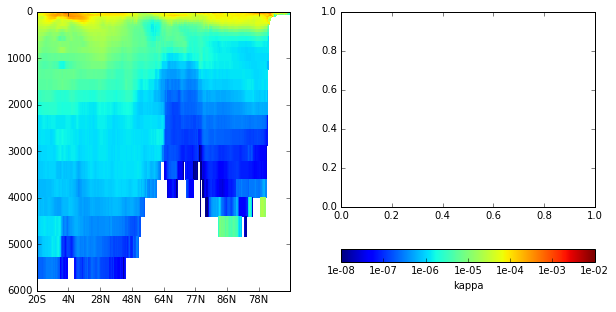

In [30]:
# fig, axes = plt.subplots(1,4, figsize=(10,5))
x = nav_lat[:,272]
y = zlevels[:]
X, Y = np.meshgrid(x[:], y[:])
# for data, ax in zip(zonalC.keys(),axes):
#     mesh=ax.pcolor(X,Y,zonalC[data])
#     ax.set_title(data)
#     ax.set_ylim(ax.get_ylim()[::-1])
norm = colors.LogNorm(vmin=10**-8,vmax=10**-2)
#norm = colors.SymLogNorm(vmin=-10**-3,vmax=10**-3,linthresh=10**-8,linscale=0)




fig, axes = plt.subplots(1,2, figsize=(10,5))
x = np.arange(0,800)
y = zlevels[:]
X, Y = np.meshgrid(x[:], y[:])
mesh = axes[0].pcolor(X,Y,zonalC['cn'+year],norm=norm)


ticks = [-10**-3, -10**-4, -10**-5,-10**-6, -10**-7,10**-8,10**-7,10**-6,10**-5, 10**-4, 10**-3, 10**-2] 
bar = plt.colorbar(mesh, orientation='horizontal' ,label='kappa',format='%.0e')
# ticks = ['-10e-2', '-10e-3', '-10e-4', '-10e-5',
#          '+/-10e-6', '10e-5', '10e-4', '10e-3', '10e-2'] 
# bar.ax.set_xticklabels(ticks,rotation=70)
axes[0].set_xticklabels(labels3)
axes[0].set_ylim(axes[0].get_ylim()[::-1])

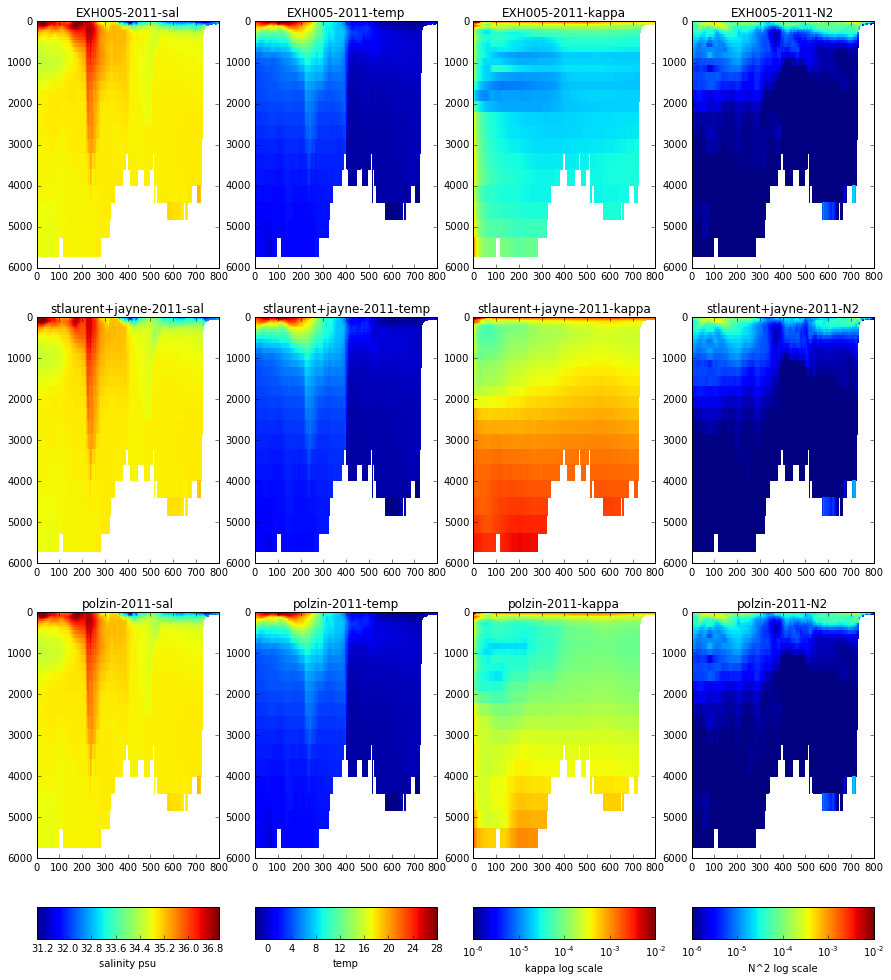

In [44]:
fig, axes = plt.subplots(3,4, figsize = (15,15))
x = np.arange(0,800)
y = zlevels[:]
X, Y = np.meshgrid(x[:], y[:])
# cmap = plt.get_cmap('jet',25)
# cmap.set_bad('burlywood')
# for ax,k,label in zip (axes.flat, zonal.keys(),['EXH005','VJT002','VJT003','EXH005','VJT002','VJT003']):
#     ax.pcolor(zonal[k], label = '%s'%(label))


axes[0,0].pcolor(X,Y,zonalC['cs'+year],vmin=31,vmax=37)
axes[0,0].set_title('EXH005-2011-sal')
axes[0,0].set_ylim(axes[0,0].get_ylim()[::-1])
axes[1,0].pcolor(X,Y,zonalLJ['ljs'+year],vmin=31,vmax=37)
axes[1,0].set_title('stlaurent+jayne-2011-sal')
axes[1,0].set_ylim(axes[1,0].get_ylim()[::-1])
mesh=axes[2,0].pcolor(X,Y,zonalP['ps'+year],vmin=31,vmax=37)
axes[2,0].set_title('polzin-2011-sal')
axes[2,0].set_ylim(axes[2,0].get_ylim()[::-1])
box = axes[2,0].get_position()
cbaxes = fig.add_axes([box.x0, 0.05,box.width,0.03])  
cb = plt.colorbar(mesh, orientation='horizontal' ,cax = cbaxes,label='salinity psu')  

mesh=axes[0,1].pcolor(X,Y,zonalC['ct'+year],vmin=-2, vmax=28)
axes[0,1].set_title('EXH005-2011-temp')
axes[0,1].set_ylim(axes[0,1].get_ylim()[::-1])
axes[1,1].pcolor(X,Y,zonalLJ['ljt'+year],vmin=-2, vmax=28)
axes[1,1].set_title('stlaurent+jayne-2011-temp')
axes[1,1].set_ylim(axes[1,1].get_ylim()[::-1])
mesh = axes[2,1].pcolor(X,Y,zonalP['pt'+year],vmin=-2, vmax=28)
axes[2,1].set_title('polzin-2011-temp')
axes[2,1].set_ylim(axes[2,1].get_ylim()[::-1])
box = axes[2,1].get_position()
cbaxes = fig.add_axes([box.x0, 0.05,box.width,0.03]) 
cb = plt.colorbar(mesh, orientation='horizontal' ,cax = cbaxes,label='temp')


norm = colors.LogNorm(vmin=10**-6,vmax=10**-2)

axes[0,2].pcolor(X,Y,zonalC['ck'+year],norm=norm)
axes[0,2].set_title('EXH005-2011-kappa')
axes[0,2].set_ylim(axes[0,2].get_ylim()[::-1])
axes[1,2].pcolor(X,Y,zonalLJ['ljk'+year],norm=norm)
axes[1,2].set_title('stlaurent+jayne-2011-kappa')
axes[1,2].set_ylim(axes[1,2].get_ylim()[::-1])
mesh = axes[2,2].pcolor(X,Y,zonalP['pk'+year],norm=norm)
axes[2,2].set_title('polzin-2011-kappa')
axes[2,2].set_ylim(axes[2,2].get_ylim()[::-1])
box = axes[2,2].get_position()
cbaxes = fig.add_axes([box.x0, 0.05,box.width,0.03])
cb = plt.colorbar(mesh, orientation='horizontal' ,cax = cbaxes,label='kappa log scale')

axes[0,3].pcolor(X,Y,zonalC['cn'+year],norm=norm)
axes[0,3].set_title('EXH005-2011-N2')
axes[0,3].set_ylim(axes[0,3].get_ylim()[::-1])
axes[1,3].pcolor(X,Y,zonalLJ['ljn'+year],norm=norm)
axes[1,3].set_title('stlaurent+jayne-2011-N2')
axes[1,3].set_ylim(axes[1,3].get_ylim()[::-1])
mesh = axes[2,3].pcolor(X,Y,zonalP['pn'+year],norm=norm)
axes[2,3].set_title('polzin-2011-N2')
axes[2,3].set_ylim(axes[2,3].get_ylim()[::-1])
box = axes[2,3].get_position()
cbaxes = fig.add_axes([box.x0, 0.05,box.width,0.03]) 
cb = plt.colorbar(mesh, orientation='horizontal' ,cax = cbaxes,label='N^2 log scale')

In [32]:
#difference plots
def mask(x):
    y = ma.array(x,mask=zonal_mask)
    return y
ljsdiff={}
ljtdiff={}
ljkdiff={}
ljndiff={}
psdiff={}
ptdiff={}
pkdiff={}
pndiff={}
ljpsdiff={}
ljptdiff={}
ljpkdiff={}
ljpndiff={}
#difference metrics
absljt = []
absljs = []
absljk = []
abspt = []
absps = []
abspk = []
for year in years:
    
    ljsdiff[year] = mask(zonalC['cs'+year] - zonalLJ['ljs'+year])
    absljs.append(np.sum(np.absolute(ljsdiff[year])))
    
    ljtdiff[year] = mask(zonalC['ct'+year] - zonalLJ['ljt'+year])
    absljt.append(np.sum(np.absolute(ljtdiff[year])))
    
    ljkdiff[year] = mask(zonalC['ck'+year] - zonalLJ['ljk'+year])
    absljk.append(np.sum(np.absolute(ljkdiff[year])))
    
    ljndiff[year] = mask(zonalC['cn'+year] - zonalLJ['ljn'+year])
    #absljn.append(np.sum(np.absolute(ljndiff[year])))
    
    psdiff[year] = mask(zonalC['cs'+year] - zonalP['ps'+year])
    absps.append(np.sum(np.absolute(psdiff[year])))
    
    ptdiff[year] = mask(zonalC['ct'+year] - zonalP['pt'+year])
    abspt.append(np.sum(np.absolute(ptdiff[year])))
    
    pkdiff[year] = mask(zonalC['ck'+year] - zonalP['pk'+year])
    abspk.append(np.sum(np.absolute(pkdiff[year])))
    
    pndiff[year] = mask(zonalC['cn'+year] - zonalP['pn'+year])
    
    ljpsdiff[year] = mask(zonalLJ['ljs'+year]-zonalP['ps'+year])
    
    ljptdiff[year] = mask(zonalLJ['ljt'+year]-zonalP['pt'+year])
    
    ljpkdiff[year] = mask(zonalLJ['ljk'+year]-zonalP['pk'+year])
    
    ljpndiff[year] = mask(zonalLJ['ljn'+year]-zonalP['pn'+year])
    
# ljpsdiff = mask(zonal['ljs']-zonal['ps'])
# ljptdiff = mask(zonal['ljt']-zonal['pt'])
# ljpkdiff = mask(zonal['ljk']-zonal['pk'])

In [33]:
ljndiff['2011'].max()

0.00070825348082770106

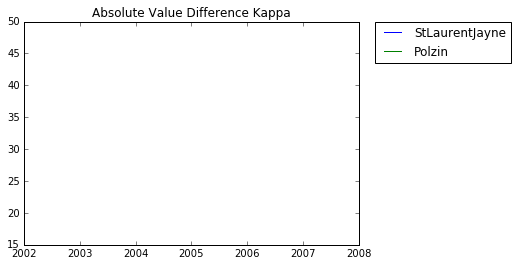

In [34]:
fig, ax = plt.subplots()
ax.plot(absljk,label='StLaurentJayne')
ax.plot(abspk,label='Polzin')
ax.set_title('Absolute Value Difference Kappa')
ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
ax.set_xticklabels(['2002','2003','2004','2005','2006','2007','2008','2009'])

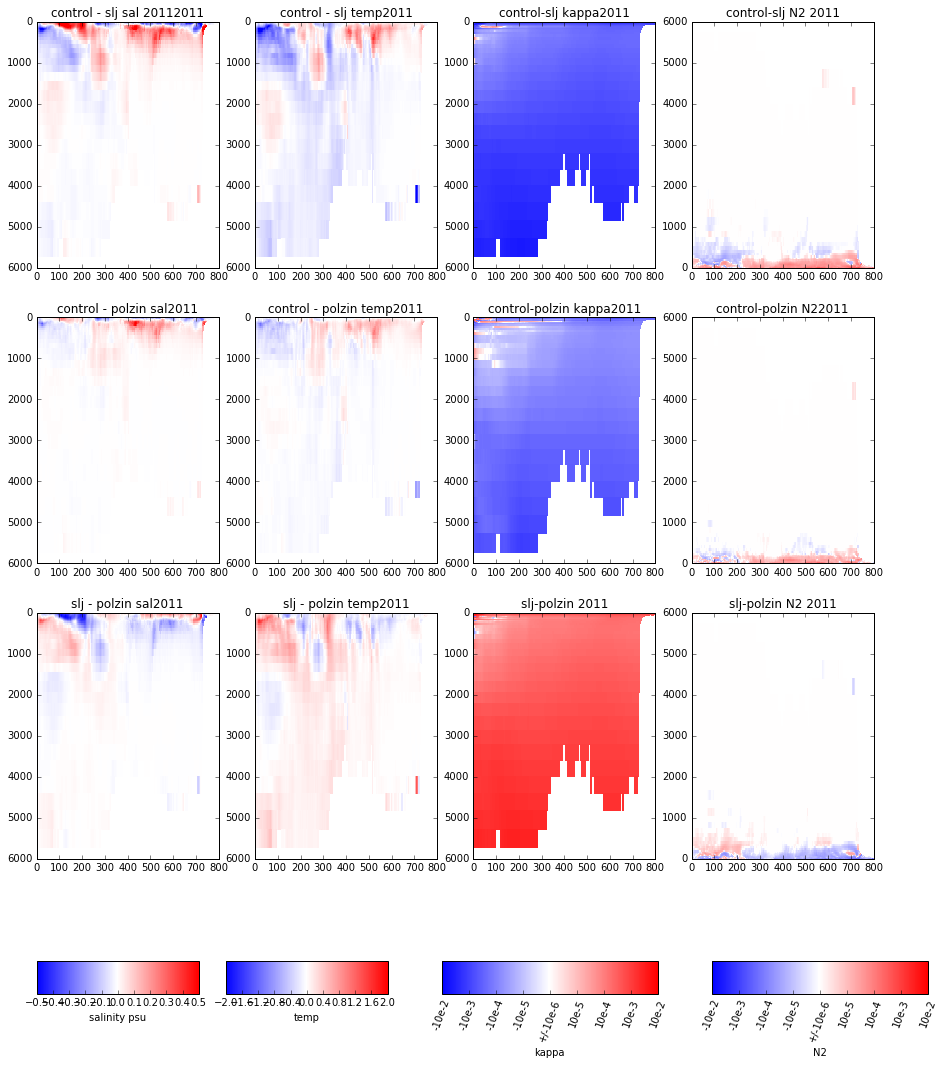

In [35]:
fig, axes = plt.subplots(3,4, figsize = (15,15))
cmap = plt.get_cmap('bwr')
cmap2 = plt.get_cmap('jet')
y='2011'
axes[0,0].pcolor(X,Y,ljsdiff[y],cmap=cmap,vmin=-0.5,vmax=0.5)
axes[0,0].set_title('control - slj sal 2011'+y)
axes[0,0].set_ylim(axes[0,0].get_ylim()[::-1])
mesh=axes[1,0].pcolor(X,Y,psdiff[y],cmap=cmap,vmin=-0.5,vmax=0.5)
axes[1,0].set_title('control - polzin sal'+y)
axes[1,0].set_ylim(axes[1,0].get_ylim()[::-1])
axes[2,0].pcolor(X,Y,ljpsdiff[y],cmap=cmap,vmin=-0.5,vmax=0.5)
axes[2,0].set_title('slj - polzin sal'+y)
axes[2,0].set_ylim(axes[2,0].get_ylim()[::-1])
cbaxes = fig.add_axes([0.125, 0,0.15,0.03])  
cb = plt.colorbar(mesh, orientation='horizontal' ,cax = cbaxes,label='salinity psu') 

axes[0,1].pcolor(X,Y,ljtdiff[y],cmap=cmap,vmin=-2,vmax=2)
axes[0,1].set_title('control - slj temp'+y)
axes[0,1].set_ylim(axes[0,1].get_ylim()[::-1])
mesh=axes[1,1].pcolor(X,Y,ptdiff[y],cmap=cmap,vmin=-2,vmax=2)
axes[1,1].set_title('control - polzin temp'+y)
axes[1,1].set_ylim(axes[1,1].get_ylim()[::-1])
mesh=axes[2,1].pcolor(X,Y,ljptdiff[y],cmap=cmap,vmin=-2,vmax=2)
axes[2,1].set_title('slj - polzin temp'+y)
axes[2,1].set_ylim(axes[2,1].get_ylim()[::-1])
cbaxes = fig.add_axes([0.3, 0,0.15,0.03]) 
cb = plt.colorbar(mesh, orientation='horizontal' ,cax = cbaxes,label='temp') 

synnorm = colors.SymLogNorm(vmin=-10**-2,vmax=10**-2,linthresh=10**-6,linscale=0)


axes[0,2].pcolor(X,Y,ljkdiff[y],cmap=cmap,norm=synnorm)
axes[0,2].set_title('control-slj kappa'+y)
axes[0,2].set_ylim(axes[0,2].get_ylim()[::-1])
mesh=axes[1,2].pcolor(X,Y,pkdiff[y],cmap=cmap,norm=synnorm)
axes[1,2].set_title('control-polzin kappa'+y)
axes[1,2].set_ylim(axes[1,2].get_ylim()[::-1])
mesh=axes[2,2].pcolor(X,Y,ljpkdiff[y],cmap=cmap,norm=synnorm)
axes[2,2].set_title('slj-polzin '+y)
axes[2,2].set_ylim(axes[2,2].get_ylim()[::-1])
cbaxes = fig.add_axes([0.5, 0,0.2,0.03]) 
ticks = [-10**-2, -10**-3, -10**-4, -10**-5,10**-6, 10**-5, 10**-4, 10**-3, 10**-2] 
bar = plt.colorbar(mesh, orientation='horizontal' ,ticks=ticks,cax = cbaxes,label='kappa',format='%.0e')
ticks = ['-10e-2', '-10e-3', '-10e-4', '-10e-5',
         '+/-10e-6', '10e-5', '10e-4', '10e-3', '10e-2'] 
bar.ax.set_xticklabels(ticks,rotation=70)
# cb.set_ticks(ticks)
# cb.set_ticklabels(ticks)
synnorm2 = colors.SymLogNorm(vmin=-10**-4,vmax=10**-4,linthresh=10**-8,linscale=0)
axes[0,3].pcolor(X,Y,ljndiff[y],cmap=cmap,norm=synnorm)
axes[0,3].set_title('control-slj N2 '+y)
axes[0,3].set_ylim(axes[0,2].get_ylim()[::-1])
mesh=axes[1,3].pcolor(X,Y,pndiff[y],cmap=cmap,norm=synnorm)
axes[1,3].set_title('control-polzin N2'+y)
axes[1,3].set_ylim(axes[1,2].get_ylim()[::-1])
mesh=axes[2,3].pcolor(X,Y,ljpndiff[y],cmap=cmap,norm=synnorm)
axes[2,3].set_title('slj-polzin N2 '+y)
axes[2,3].set_ylim(axes[2,2].get_ylim()[::-1])
cbaxes = fig.add_axes([0.75, 0,0.2,0.03]) 
ticks = [-10**-2, -10**-3, -10**-4, -10**-5,10**-6, 10**-5, 10**-4, 10**-3, 10**-2] 
bar = plt.colorbar(mesh, orientation='horizontal' ,ticks=ticks,cax = cbaxes,label='N2',format='%.0e')
ticks = ['-10e-2', '-10e-3', '-10e-4', '-10e-5',
         '+/-10e-6', '10e-5', '10e-4', '10e-3', '10e-2'] 
bar.ax.set_xticklabels(ticks,rotation=70)


In [36]:
filename = glob.glob(path+'y'+year+'m??d??_gridW.nc')
avg_kappa = np.zeros((50,800,544),dtype=float)
for f in np.arange(0,len(filename)):
        tracer = nc.Dataset(filename[f])
        kappa = tracer.variables['votkeavt'][0,:,:,:]
        kap = kappa.ravel()
        kap[kap > 0.01] = 10**-6
        avg_kappa[:,:,:] = avg_kappa[:,:,:]+kappa[:,:,:]
    avg = len(filename)*np.ones((50,800,544))
    avg_kappa = avg_kappa/avg
    tracer = nc.Dataset(filename[0])

for i in np.arange(0,len(kappa[0,:,0])):
    for j in np.arange(0,len(kappa[0,0,:])):
        for k in np.arange(0,len(kappa[:,0,0])):
            if kappa[k,i,j] > 0.01:
                count910 = count910 +1
                kappa[k,i,j] = np.nan

IndentationError: unindent does not match any outer indentation level (<ipython-input-36-71e74e4ea83b>, line 9)

In [ ]:
import pylab as pl
import numpy as np

MIN, MAX = 10**(-7), 10**(-2)
variable = n2_avg
pl.figure()
pl.hist(variable.ravel(), bins = 10 ** np.linspace(np.log10(MIN), np.log10(MAX), 50))
pl.gca().set_xscale("log")
pl.title('n2_avg density')
pl.show()

In [ ]:
np.save('EXH09avgs06-09.npy',avgs)

In [ ]:
avgs03_05 = np.load('avgs03-05.npy')
avgs06_09 = np.load('avgs06-09.npy')

In [ ]:
Eavgs03_05 = np.load('EXH09avgs03.npy')
Eavgs06_09 = np.load('EXH09avgs06-09.npy')

In [ ]:
print(avgs03_05[()]['temp2004'])

In [ ]:
#create a function that plots a vertical cross section of a given tracer at a given location
def plot_cross_section(trac):
    fig, (axl, axr) = plt.subplots(1, 2, figsize=(16, 8))
    land_colour = 'burlywood'

    # Define the v velocity component slice to plot
    zmax, ylocn = 49, 650
    section_slice = np.arange(200, 400)

    # Slice and mask the tracer array
    vgrid_tzyx = np.ma.masked_values(trac[:zmax, ylocn, section_slice], 0)

    # Plot the v velocity colour mesh
    cmap = plt.get_cmap('ocean')
    cmap.set_bad(land_colour)
    mesh = axl.pcolormesh(
        section_slice[:], zlevels[:zmax], vgrid_tzyx,
        cmap=cmap,
        )
    axl.invert_yaxis()
    cbar = fig.colorbar(mesh, ax=axl)
    #cbar.set_label('Tracer [{.units}]'.format(vgrid))

    # Axes labels and title
    axl.set_xlabel('x Index')
    axl.set_ylabel('{0.long_name} [{0.units}]'.format(zlevels))
    axl.set_title(
        '24h Average v Velocity at y={y}'
        .format(y=ylocn))

    # Axes limits and grid
    axl.set_xlim(section_slice[1], section_slice[-1])
    axl.set_ylim(zlevels[zmax - 2] + 10, 0)
    axl.set_axis_bgcolor(land_colour)
    axl.grid()

    # Define surface current magnitude slice
    x_slice = np.arange(150, 350)
    y_slice = np.arange(425, 575)

    # Slice and mask the u and v arrays
#     ugrid_tzyx = np.ma.masked_values(ugrid[t, 0, y_slice, x_slice], 0)
#     vgrid_tzyx = np.ma.masked_values(vgrid[t, 0, y_slice, x_slice], 0)

    # "Unstagger" the velocity values by interpolating them to the T-grid points
    # and calculate the surface current speeds
#     u_tzyx, v_tzyx = viz_tools.unstagger(ugrid_tzyx, vgrid_tzyx)
#     speeds = np.sqrt(np.square(u_tzyx) + np.square(v_tzyx))
#     max_speed = viz_tools.calc_abs_max(speeds)

#     # Plot section line on surface streamlines map
#     viz_tools.set_aspect(axr)
#     axr.streamplot(
#         x_slice[1:], y_slice[1:], u_tzyx, v_tzyx,
#         linewidth=7*speeds/max_speed,
#         )
#     viz_tools.plot_land_mask(
#         axr, grid, xslice=x_slice, yslice=y_slice, color=land_colour)
#     axr.plot(
#         section_slice, ylocn*np.ones_like(section_slice),
#         linestyle='solid', linewidth=3, color='black',
#         label='Section Line',
#     )

#     # Axes labels and title
#     axr.set_xlabel('x Index')
#     axr.set_ylabel('y Index')
#     axr.set_title(
#         '24h Average Surface Streamlines on {date}'
#         .format(date=timestamp.format('DD-MMM-YYYY')))
#     legend = axr.legend(loc='best', fancybox=True, framealpha=0.25)

#     # Axes limits and grid
#     axr.set_xlim(x_slice[0], x_slice[-1])
#     axr.set_ylim(y_slice[0], y_slice[-1])
#     axr.grid()
    
    

In [ ]:
plot_cross_section(sal2009)

In [ ]:
def plot_base(t,zlevel, veddy,ax,year,tracer):
    ved_part = np.ma.masked_values(veddy[zlevel, :,:], 0)
    #ved_part = veddy[zlevel,:,:]
    cmap = plt.get_cmap('seismic')
    m = Basemap(projection='npstere',boundinglat=60,lon_0=0,resolution='l',round=False, ax=ax)
    m.drawcoastlines()
    m.fillcontinents(color = '0.85')
    m.drawparallels(np.arange(-80.,90.,10.),labels=[1, 0, 0, 0],color='darkblue',latmax=90)
    m.drawmeridians(np.arange(-180.,180.,10.),labels=[0, 0, 0, 1],color='darkblue',latmax=90)
    x_lon, y_lat = m(nav_lon, nav_lat)
    m = m.pcolor(x_lon[:,:],y_lat[:,:],ved_part,vmin=ved_part.min(), vmax=12)
                 #norm=colors.LogNorm(vmin=ved_part.min(), vmax=ved_part.max()))
    cbar = fig.colorbar(m,ax=ax,shrink=.8)

    cbar.set_label(year+' average '+tracer)
    ax.set_title(year+' average '+tracer+' {d:.2f}{z.units}'.format(d=zlevels[zlevel], z=zlevels))
    return True

In [ ]:
fig, axes = plt.subplots(3, 1, figsize=(10, 30))
zlevel = (0,20,40)
grid = avgs06_09[()]['temp2006']
for axis, depth in zip(axes[:],zlevel):
    plot_base(0,depth,grid,axis,'2006','temp EXH05')